- ใน Notebook นี้ประกอบด้วย 2 model ได้แก่ Decision Tree (แสดงในหัวข้อที่ 6) และ Random Forest (แสดงในหัวข้อที่ 8) โดยใช้ data set ชุดเดียวกัน เพื่อประเมินผลเทียบกันระหว่าง model ทั้ง 2

- data set "German Credit Risk" เป็นข้อมูลเกี่ยวข้องกับการกู้ยืมเพื่อใช้ตามวัตถุประสงค์ต่าง ๆ ต้งแต่ซื้อเครื่องใช้ไฟฟ้าไปจนถึงการกู้ยืมเพื่อธุรกิจ ในชุดข้อมูลจะประกอบด้วยข้อมูลของผู้กู้ รวมถึง การประเมินความเสี่ยงของผู้กู้ ซึ่ง แสดงไว้ใน DataFrame (df) ดังแสดงไว้ในหัวข้อ 1

- ข้อมูลใน df มีจำนวน features ทั้งหมด 10 ตัว (features ตัวสุดท้าย 'Risk' เป็น label) แต่ละ feature มีทั้งสิ้น 1,000 entries (สมาชิก)

จากการตรวจสอบ (ด้วย df.info()) พบว่ามี feature 2 ตัวที่มี entries ที่ประกอบด้วย NaN (ซึ่ง feature ทั้ง 2 มีข้อมูลชนิด Object) feature ทั้งสองได้แก่ 'Saving accounts' มีสมาชิก 817 ตัว 'Checking account' มีสมาชิก 606 ตัว 

การ cleasing ข้อมูลใช้วิธี fill ข้อมูลลงไปโดยอาศัย ว่าข้อมูลเดิมมีอะไรบ้าง และมีในสัดส่วนเท่าใด เช่น มี A 5 ตัว B 3 ตัว และ C 2 ตัว หรือ คิดเป็นจัดส่วนคือ A มีจำนวน 50% B มีจำนวน 30% C มีจำนวน 20% ดังนั้นในการ fill ค่าที่เป็น NaN ก็จะ fill ตามสัดส่วนเดียวกันนั้น ซึ่งรายละเอียดส่วนนี้แสดงในหัวข้อ 2 Cleansing 

การ train ข้อมูล ใช้ข้อมูลอยู่ 3 ลักษณะ ได้แก่
*   ข้อมูลแบบ default แสดงในหัวข้อ 3
*   ข้อมูลที่ผ่านการ normalization แสดงในหัวข้อ 4
*   ข้อมูลที่ผ่านการ standardizaton แสดงในหัวข้อ 5
*   ใช้วิธี Grid search แสดงในหัวข้อ 6.4 กับ 8.4 โดยใช้ข้อมูลแบบ default

ข้อมูลที่ผ่านการ normalization กับ standardizaton แบ่งออกเป็นอีก 2 แบบคือ 
*   normalization หรือ standardizaton ก่อน แล้วทำการ splitting (แสดงในหัวข้อ 6.2.1 กับ 8.2.1)
*   splitting ก่อนแล้วถึง normalization กับ standardizaton (แสดงในหัวข้อ 6.2.2 กับ 8.2.2)

-ผลการสร้าง model แสดงในตารางที่อยู่ในหัวข้อ 9 ซึ่งเป็นรายการสรุปค่า model evaluation ด้วยวิธีวัดแบบ Accuracy	, F1 score	, Recall	และ Precision ด้วยข้อมูลทั้งหมด 6 ลักษณะ คือ default

splitting ก่อนแล้วถึง normalization กับ standardizaton (normalize before split กับ standardize before split) 

normalization หรือ standardizaton ก่อน แล้วทำการ splitting (normalize after split กับ standardize after split)

และ grid search

เปรียบเทียบค่า model evaluation ด้วยข้อมูลจากวิธี grid search โดยแสดงในรูป bar chart



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV

import random 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/Decision%20Tree%20%26%20German%20Credit%20Risk/datasets_9109_12699_german_credit_data.csv'
df = pd.read_csv(url,index_col=0)

#https://www.kaggle.com/uciml/german-credit

# 1 df before cleansing

## 1.1 information



In [ ]:
df.sample(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
684,31,male,1,own,moderate,moderate,9857,36,business,good
158,38,male,2,own,moderate,moderate,3512,24,car,good
877,28,male,2,own,little,NaN,3595,36,radio/TV,good
539,45,female,1,own,little,rich,3049,18,furniture/equipment,good
985,25,female,2,rent,little,little,1433,15,furniture/equipment,good


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [ ]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [ ]:
#df.head(10)

In [ ]:
#df.tail(10)

## 1.2 plot

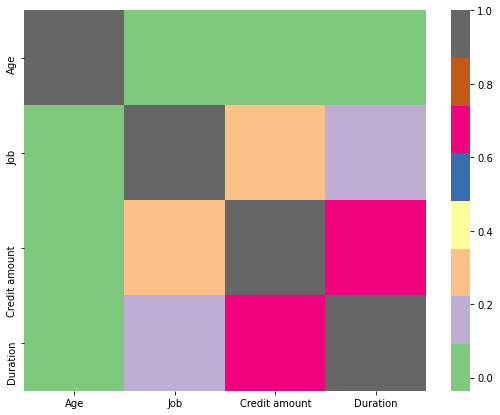

In [ ]:
fig = plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='Accent')

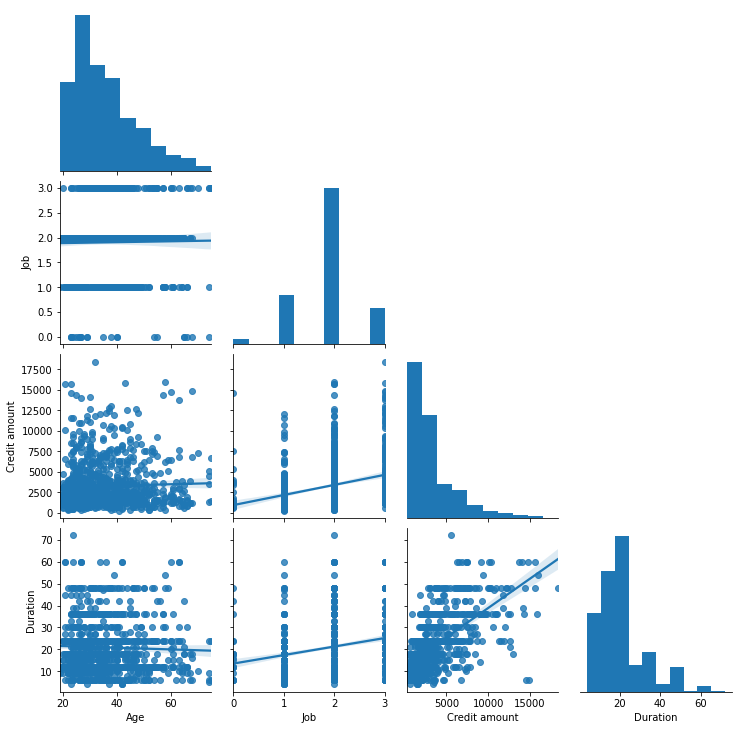

In [ ]:
sns.pairplot(df,kind='reg',corner=True)

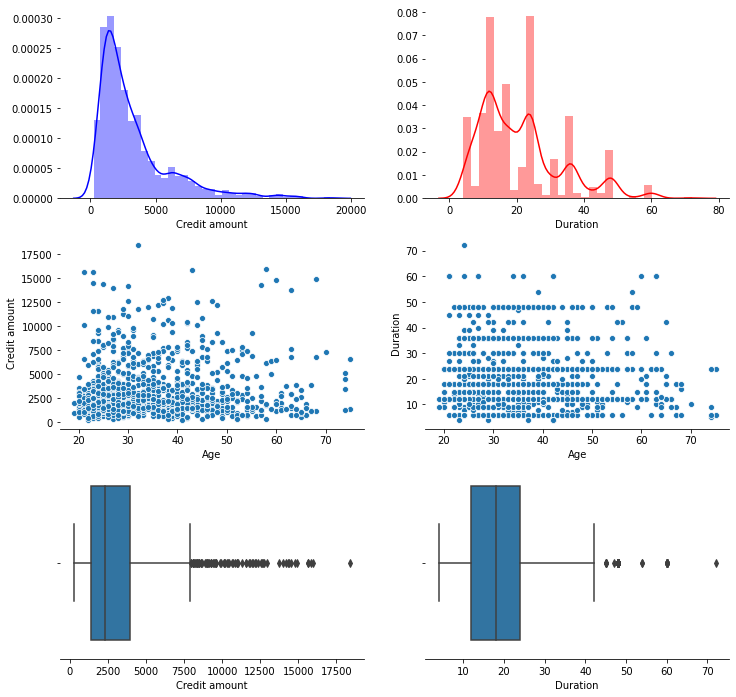

In [ ]:
f, axes = plt.subplots(3, 2, figsize=(12, 12), sharex=False)
sns.despine(left=True)

sns.distplot(df.iloc[:,6], kde=True, color="b", ax=axes[0,0])
sns.distplot(df.iloc[:,7], kde=True, color="r", ax=axes[0,1])
#sns.distplot(df.iloc[:,8], kde=True, color="g", ax=axes[0,2])

sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,6],data=df, ax=axes[1, 0])
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,7],data=df, ax=axes[1, 1])
#sns.scatterplot(x=df.iloc[:,3],y=df.iloc[:,8],data=df, ax=axes[1, 2])

sns.boxplot(df.iloc[:,6],ax=axes[2, 0])
sns.boxplot(df.iloc[:,7],ax=axes[2, 1])
#sns.boxplot(df.iloc[:,8],ax=axes[2, 2])

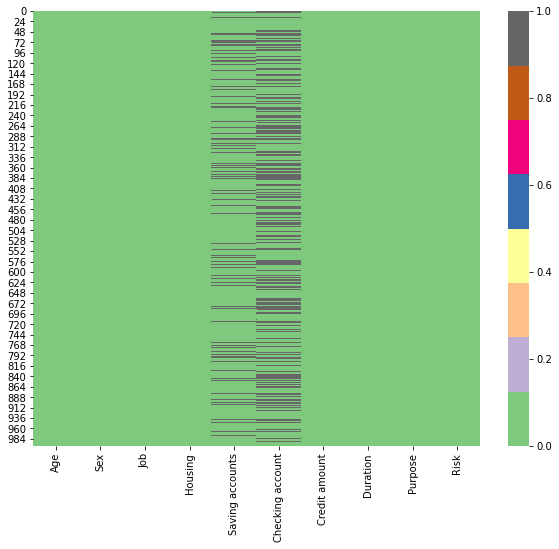

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=True, cmap='Accent')

#2 cleansing

## 2.2 fill with object

In [ ]:
#df['rangeAge'] = pd.cut(df.iloc[:,0],[10,20,30,40,50,60,70,80])
#df1 = df[(df.iloc[:,9] == pd.Interval(60, 70))]
#df1.iloc[:,5].value_counts()

### 2.2.1 ใส่ค่า สตริงในช่องว่าง ด้วยการใส่ ตามอัตราส่วนที่มีค่า แก้ไข column ที่ 4 , 5

In [ ]:
#ส่วนนี้มีวัตถุประสงค์ต้องการหาสัดส่วนของแต่ล่ะ label เพื่อใช้ปรับส่วนที่ เป็น NaN ให้มีสัดส่วนสอดคล้องกันกับส่วนที่มีค่า
k = 4 #หมายเลขของ column

nonNaNValue = 0 #นับจำนวนข้อมูลที่ไม่ใช่ค่า null nan
label_list = [] #label ที่มีว่า มีอะไรบ้าง 
num_label_list = [] #จำนวน label แต่ล่ะชื่อมีจำนวนเท่าไหร

for i in range(df.iloc[:,k].value_counts().count()):
  nonNaNValue = nonNaNValue + df.iloc[:,k].value_counts()[i]
  label_list.append(df.iloc[:,k].value_counts().index[i]) 
  num_label_list.append(df.iloc[:,k].value_counts()[i])

#num_label_list = [603, 103, 63, 48] nonNaNValue = 817
nanValue = len(df.index) - nonNaNValue #จำนวนข้อมูลที่เป็น nan null กรณีนี้เท่ากับ 183 

ratio_list = [] #อัตราส่วนของจำนวน label ที่ไม่ใช่ nan null 
for i in range(len(label_list)):
  ratio_list.append(num_label_list[i]/nonNaNValue) 

nan_label_list = [] #จำนวน label ที่เป็น nan ตามอัตราส่วนเดียวกับที่ไม่เป็น nan
num_NaN = 0

#หาจำนวน nan ตามอัตราส่วน
for i in range(len(ratio_list)-1):
  nan_label_list.append(round(ratio_list[i]*nanValue).astype(int))
  num_NaN = num_NaN + nan_label_list[i]
nan_label_list.append(nanValue-num_NaN) #[135, 23, 14, 11]

#นำ label มาสร้างตามจำนวน nan และแต่ล่ะ label ก็มีตามอัตราส่วน แล้วใส่ใน data_list
data_list = []
for i in range(len(nan_label_list)):
  for j in range(nan_label_list[i]):
    data_list.append(label_list[i])

random.shuffle(data_list)

NaN_index = [] #หา index ของแถวที่เป็น NaN  
for i in range(len(df.index)):
  if pd.isnull(df.iloc[i,k]):
    NaN_index.append(i)

#len(NaN_index) = 183

for i in range(len(NaN_index)):
  df.iloc[NaN_index[i],k] = data_list[i]

In [ ]:
k = 5

nonNaNValue = 0 
label_list = []  
num_label_list = [] 

for i in range(df.iloc[:,k].value_counts().count()):
  nonNaNValue = nonNaNValue + df.iloc[:,k].value_counts()[i]
  label_list.append(df.iloc[:,k].value_counts().index[i]) 
  num_label_list.append(df.iloc[:,k].value_counts()[i])

nanValue = len(df.index) - nonNaNValue

ratio_list = [] 
for i in range(len(label_list)):
  ratio_list.append(num_label_list[i]/nonNaNValue) 

nan_label_list = [] 
num_NaN = 0

for i in range(len(ratio_list)-1):
  nan_label_list.append(round(ratio_list[i]*nanValue).astype(int))
  num_NaN = num_NaN + nan_label_list[i]
nan_label_list.append(nanValue-num_NaN) 

data_list = []
for i in range(len(nan_label_list)):
  for j in range(nan_label_list[i]):
    data_list.append(label_list[i])

random.shuffle(data_list)

NaN_index = []   
for i in range(len(df.index)):
  if pd.isnull(df.iloc[i,k]):
    NaN_index.append(i)

for i in range(len(NaN_index)):
  df.iloc[NaN_index[i],k] = data_list[i]

## 2.3 get one hot df

In [ ]:
df_real = pd.get_dummies(df,drop_first=True)
df_real.sample(5)

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
336,23,1,2101,13,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
549,35,2,8858,48,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1
834,25,1,2327,15,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
157,45,1,339,12,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
47,23,0,1352,6,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1


# 3 defaut df

## 3.1 splitting

In [ ]:
label_col = 19 #กำหนด index ให้ label เพื่อความสะดวกในการแก้ code 

X = df_real.drop(df_real.columns[label_col],axis=1)
y = df_real.iloc[:,label_col]

In [ ]:
X_train , X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=100)

#4 normalization df


## 4.1 normalization before splitting

In [ ]:
minMaxScaler_X = MinMaxScaler()

nordf_X = minMaxScaler_X.fit_transform(X_train)
dfnor_X = pd.DataFrame(nordf_X,columns=df_real.columns[0:label_col])

## 4.2 normalization after splitting

In [ ]:
minMaxScaler_X_tr = MinMaxScaler()
minMaxScaler_X_te = MinMaxScaler()

nordf_X_tr = minMaxScaler_X_tr.fit_transform(X_train)
dfnor_X_tr = pd.DataFrame(nordf_X_tr,columns=df_real.columns[0:label_col])

nordf_X_te = minMaxScaler_X_tr.fit_transform(X_test)
dfnor_X_te = pd.DataFrame(nordf_X_te,columns=df_real.columns[0:label_col])

#df_norm = min_max_scaler.fit_transform(df.drop(df.columns[9],axis=1))
#norm_df = pd.DataFrame(df_norm,columns=df.columns[0:9])
#norm_df.sample(5)

#5 standardization df

## 5.1 standardization before splitting

In [ ]:
stdScaler_X = StandardScaler()

stddf_X = stdScaler_X.fit_transform(X_train)
dfstd_X = pd.DataFrame(stddf_X,columns=df_real.columns[0:label_col])

## 5.2 standardization before splitting

In [ ]:
stdScaler_X_tr = StandardScaler()
stdScaler_X_te = StandardScaler()

stddf_X_tr = stdScaler_X_tr.fit_transform(X_train)
dfstd_X_tr = pd.DataFrame(stddf_X_tr,columns=df_real.columns[0:label_col])

stddf_X_te = stdScaler_X_te.fit_transform(X_test)
dfstd_X_te = pd.DataFrame(stddf_X_te,columns=df_real.columns[0:label_col])

#df_stad = stand_scaler.fit_transform(df.drop(df.columns[9],axis=1))
#stad_df = pd.DataFrame(df_stad,columns=df.columns[0:9])
#stad_df.sample(5)

# 6 sklearn-DecisionTree (all-features)

## 6.1 Default

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predict = dtree.predict(X_test)

**Model Evaluation**

In [ ]:
confusion_matrix(y_test,y_predict)

array([[ 22,  34],
       [ 41, 103]])

In [ ]:
p1 = np.array([accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)])

## 6.2 Normalization

### 6.2.1 normalization after splitting


In [ ]:
dtree_nor1 = DecisionTreeClassifier()
dtree_nor1.fit(dfnor_X,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predict_nor1 = dtree_nor1.predict(dfnor_X_te)

**Model Evaluation**

In [ ]:
confusion_matrix(y_test,y_predict_nor1)

array([[ 23,  33],
       [ 44, 100]])

In [ ]:
p2 = np.array([accuracy_score(y_test,y_predict_nor1),f1_score(y_test,y_predict_nor1),precision_score(y_test,y_predict_nor1),recall_score(y_test,y_predict_nor1)])

In [ ]:
p1 = np.vstack((p1,p2))

### 6.2.2 normalization after splitting


In [ ]:
dtree_nor2 = DecisionTreeClassifier()
dtree_nor2.fit(dfnor_X_tr,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predict_nor2 = dtree_nor2.predict(dfnor_X_te)

**Model Evaluation**

In [ ]:
confusion_matrix(y_test,y_predict_nor2)

array([[21, 35],
       [47, 97]])

In [ ]:
p2 = np.array([accuracy_score(y_test,y_predict_nor2),f1_score(y_test,y_predict_nor2),precision_score(y_test,y_predict_nor2),recall_score(y_test,y_predict_nor2)])

In [ ]:
#data = [[accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)]]

#table_data = pd.DataFrame(data,columns=['Accuracy','F1 score','Recall','Precision'],index=['all-features/Normalization'])


In [ ]:
p1 = np.vstack((p1,p2))

##6.3 Standardization

### 6.3.1 standardization after splitting

In [ ]:
dtree_std1 = DecisionTreeClassifier()
dtree_std1.fit(dfstd_X,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predict_std1 = dtree_std1.predict(dfstd_X_te)

**Model Evaluation**


In [ ]:
confusion_matrix(y_test,y_predict_std1)

array([[ 24,  32],
       [ 38, 106]])

In [ ]:
p2 = np.array([accuracy_score(y_test,y_predict_std1),f1_score(y_test,y_predict_std1),precision_score(y_test,y_predict_std1),recall_score(y_test,y_predict_std1)])

In [ ]:
p1 = np.vstack((p1,p2))

6.3.1 standardization before splitting

In [ ]:
dtree_std2 = DecisionTreeClassifier()
dtree_std2.fit(dfstd_X_tr,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predict_std2 = dtree_std2.predict(dfstd_X_te)

**Model Evaluation**

In [ ]:
confusion_matrix(y_test,y_predict_std2)

array([[ 24,  32],
       [ 40, 104]])

In [ ]:
p2 = np.array([accuracy_score(y_test,y_predict_std2),f1_score(y_test,y_predict_std2),precision_score(y_test,y_predict_std2),recall_score(y_test,y_predict_std2)])

In [ ]:
p1 = np.vstack((p1,p2))

In [ ]:
#data = [[accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)]]
#table_data2 = pd.DataFrame(data,columns=['Accuracy','F1 score','Recall','Precision'],index=['all-features/Standardization'])
#table_data = table_data.append(table_data2)

## 6.4 Grid Search

In [ ]:
param_combination = {'max_depth':[4,8,16,32],'min_samples_leaf':[1,2,4,8]}
grid_search = GridSearchCV(DecisionTreeClassifier(),param_combination,verbose=1)

In [ ]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32],
                     

In [ ]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 4}

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_predict_grid = grid_search.predict(X_test)

**Model Evaluation**

In [ ]:
confusion_matrix(y_test,y_predict_grid)

array([[  6,  50],
       [  5, 139]])

In [ ]:
p2 = np.array([accuracy_score(y_test,y_predict_grid),f1_score(y_test,y_predict_grid),precision_score(y_test,y_predict_grid),recall_score(y_test,y_predict_grid)])

In [ ]:
p1 = np.vstack((p1,p2)).round(3)

In [ ]:
#table1 = pd.DataFrame(p1,columns=['Accuracy','F1 score','Recall','Precision'],index=['default','normalize before split','normalize after split','standardize before split','standardize after split','grid search'])
table1 = pd.DataFrame(p1,columns=['Accuracy','F1 score','Recall','Precision'],index=None)

In [ ]:
table1['model'] = np.array(['DecisionTree','DecisionTree','DecisionTree','DecisionTree','DecisionTree','DecisionTree'])

In [ ]:
table1['modelEvaluation'] = np.array(['default','normalize before split','normalize after split','standardize before split','standardize after split','grid search'])

In [ ]:
table1

,Accuracy,F1 score,Recall,Precision,model,modelEvaluation
0,0.625,0.733,0.752,0.715,DecisionTree,default
1,0.615,0.722,0.752,0.694,DecisionTree,normalize before split
2,0.590,0.703,0.735,0.674,DecisionTree,normalize after split
3,0.650,0.752,0.768,0.736,DecisionTree,standardize before split
4,0.640,0.743,0.765,0.722,DecisionTree,standardize after split
5,0.725,0.835,0.735,0.965,DecisionTree,grid search


# 7 ......

In [ ]:
X = df_real.drop(df_real.columns[[label_col,4]],axis=1)
y = df_real.iloc[:,label_col]

X_train1 , X_test1,y_train1,y_test1 = train_test_split(X,y,train_size = 0.8,random_state=100)

In [ ]:
#y_predict = nbCase1.predict(X_test)

In [ ]:
#confusion_matrix(y_test,y_predict)

In [ ]:
#accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

# 8 sklearn-RandomForest (all-features)

## 8.1 Default

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict = rf.predict(X_test)

**Model Evaluation**

In [ ]:
confusion_matrix(y_test,y_predict)

array([[ 13,  43],
       [ 17, 127]])

In [ ]:
p3 = np.array([accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)])

## 8.2 Normalization

### 8.2.1 normalization after splitting


In [ ]:
rf_nor1 = RandomForestClassifier()
rf_nor1.fit(dfnor_X,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict_nor1 = rf_nor1.predict(dfnor_X_te)

**Model Evaluation**

In [ ]:
confusion_matrix(y_test,y_predict_nor1)

array([[ 14,  42],
       [ 14, 130]])

In [ ]:
p4 = np.array([accuracy_score(y_test,y_predict_nor1),f1_score(y_test,y_predict_nor1),precision_score(y_test,y_predict_nor1),recall_score(y_test,y_predict_nor1)])

In [ ]:
p3 = np.vstack((p3,p4))

### 8.2.2 normalization after splitting


In [ ]:
rf_nor2 = RandomForestClassifier()
rf_nor2.fit(dfnor_X_tr,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict_nor2 = rf_nor2.predict(dfnor_X_te)

**Model Evaluation**

In [ ]:
confusion_matrix(y_test,y_predict_nor2)

array([[ 15,  41],
       [ 16, 128]])

In [ ]:
p4 = np.array([accuracy_score(y_test,y_predict_nor2),f1_score(y_test,y_predict_nor2),precision_score(y_test,y_predict_nor2),recall_score(y_test,y_predict_nor2)])

In [ ]:
#data = [[accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)]]

#table_data = pd.DataFrame(data,columns=['Accuracy','F1 score','Recall','Precision'],index=['all-features/Normalization'])


In [ ]:
p3 = np.vstack((p3,p4))

##8.3 Standardization

### 8.3.1 standardization after splitting

In [ ]:
rf_std1 = RandomForestClassifier()
rf_std1.fit(dfstd_X,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict_std1 = dtree_std1.predict(dfstd_X_te)

**Model Evaluation**


In [ ]:
confusion_matrix(y_test,y_predict_std1)

array([[ 24,  32],
       [ 38, 106]])

In [ ]:
p4 = np.array([accuracy_score(y_test,y_predict_std1),f1_score(y_test,y_predict_std1),precision_score(y_test,y_predict_std1),recall_score(y_test,y_predict_std1)])

In [ ]:
p3 = np.vstack((p3,p4))

6.3.1 standardization before splitting

In [ ]:
rf_std2 = RandomForestClassifier()
rf_std2.fit(dfstd_X_tr,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict_std2 = dtree_std2.predict(dfstd_X_te)

**Model Evaluation**

In [ ]:
confusion_matrix(y_test,y_predict_std2)

array([[ 24,  32],
       [ 40, 104]])

In [ ]:
p4 = np.array([accuracy_score(y_test,y_predict_std2),f1_score(y_test,y_predict_std2),precision_score(y_test,y_predict_std2),recall_score(y_test,y_predict_std2)])

In [ ]:
p3 = np.vstack((p3,p4))

In [ ]:
#data = [[accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)]]
#table_data2 = pd.DataFrame(data,columns=['Accuracy','F1 score','Recall','Precision'],index=['all-features/Standardization'])
#table_data = table_data.append(table_data2)

## 8.4 Grid Search

In [ ]:
param_combination = {'max_depth':[4,8,16,32],'min_samples_leaf':[1,2,4,8],'n_estimators':[10,20,50,100]}
grid_search1 = GridSearchCV(RandomForestClassifier(),param_combination,verbose=1)

In [ ]:
grid_search1.fit(X_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   24.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
grid_search1.best_params_

{'max_depth': 8, 'min_samples_leaf': 8, 'n_estimators': 20}

In [ ]:
grid_search1.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict_grid = grid_search1.predict(X_test)

**Model Evaluation**

In [ ]:
confusion_matrix(y_test,y_predict_grid)

array([[  8,  48],
       [  8, 136]])

In [ ]:
p4 = np.array([accuracy_score(y_test,y_predict_grid),f1_score(y_test,y_predict_grid),precision_score(y_test,y_predict_grid),recall_score(y_test,y_predict_grid)])

In [ ]:
p3 = np.vstack((p3,p4)).round(3)

In [ ]:
table2 = pd.DataFrame(p3,columns=['Accuracy','F1 score','Recall','Precision'],index=None)


In [ ]:
table2['model'] = np.array(['RandomForest','RandomForest','RandomForest','RandomForest','RandomForest','RandomForest'])

In [ ]:
table2['modelEvaluation'] = np.array(['default','normalize before split','normalize after split','standardize before split','standardize after split','grid search'])

# 9 สรุป

In [ ]:
summ_table = pd.concat([table1,table2],ignore_index=True)
summ_table

,Accuracy,F1 score,Recall,Precision,model,modelEvaluation
0,0.625,0.733,0.752,0.715,DecisionTree,default
1,0.615,0.722,0.752,0.694,DecisionTree,normalize before split
2,0.590,0.703,0.735,0.674,DecisionTree,normalize after split
3,0.650,0.752,0.768,0.736,DecisionTree,standardize before split
4,0.640,0.743,0.765,0.722,DecisionTree,standardize after split
5,0.725,0.835,0.735,0.965,DecisionTree,grid search
6,0.700,0.809,0.747,0.882,RandomForest,default
7,0.720,0.823,0.756,0.903,RandomForest,normalize before split
8,0.715,0.818,0.757,0.889,RandomForest,normalize after split
9,0.650,0.752,0.768,0.736,RandomForest,standardize before split


In [ ]:
s = summ_table.loc[summ_table.iloc[:,5]=='grid search']
s

,Accuracy,F1 score,Recall,Precision,model,modelEvaluation
5,0.725,0.835,0.735,0.965,DecisionTree,grid search
11,0.720,0.829,0.739,0.944,RandomForest,grid search


In [ ]:
pos = list(range(len(s['model']))) 
width = 0.15 

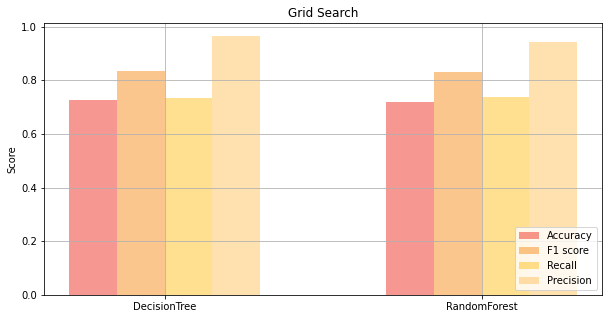

In [ ]:
#bar chart เปรียบเทียบค่า Accuracy, F1 score, Recall, Precision ของ Decision Tree Model ที่ดีที่สุด กับ Random Forest Model ด้วยการใช้ Grid Search

# Setting the positions and width for the bars
pos = list(range(len(s['model']))) 
width = 0.15 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with 'Accuracy' data,
# in position pos,
plt.bar(pos, 
        #using s['Accuracy'] data,
        s['Accuracy'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224') 

plt.bar([p + width for p in pos], 
        s['F1 score'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E') 

plt.bar([p + width*2 for p in pos], 
        s['Recall'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222') 

plt.bar([p + width*3 for p in pos], 
        s['Precision'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC260')

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Grid Search')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(s['model'])

# Adding the legend and showing the plot
plt.legend(['Accuracy', 'F1 score', 'Recall','Precision'], loc='lower right')
plt.grid()
plt.show()